## Imports

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = iris['data']
iris_target = iris['target']

iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

iris_df['target'] = iris_target

iris_df['target_name'] = iris_df['target'].map(dict(enumerate(iris['target_names'])))

iris_df['target_name'] = iris_df['target_name'].astype('category')

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
bin_iris_df = iris_df[iris_df['target_name'] != 'setosa']

response = 'target'
predictors = ['petal width (cm)', 'petal length (cm)']

X = bin_iris_df[predictors].values
y = (bin_iris_df[response] == 2).astype(np.int32).values.reshape(-1, 1)

In [4]:
X.shape, y.shape

((100, 2), (100, 1))

## Modelling

### Sigmoid

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Weights and Biases Init

In [6]:
def initialize_with_zeros(dim):
    return np.zeros((dim, 1)), 0

In [7]:
w, b = initialize_with_zeros(X.shape[1])

In [8]:
X.shape

(100, 2)

In [9]:
w.shape

(2, 1)

### Forward-Backward Propagation

Forward Propagation:
- start with $X$
- compute $A = \sigma(X \times w+ b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

partial deritavite formulas: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(A-Y)$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [10]:
m = X.shape[0]

A = sigmoid(np.dot(X, w) + b)
cost = -(np.sum(y * np.log(A) + (1-y) * np.log(1-A))) / m

dw = np.dot(X.T, (A-y)) / m
db = np.sum(A-y) / m

grads = {"dw": dw, "db": db}

In [11]:
dw.shape, w.shape

((2, 1), (2, 1))

In [12]:
A.shape, cost

((100, 1), 0.6931471805599453)

In [13]:
def propagate(w, b, X, Y):
    m = X.shape[0]

    A = sigmoid(np.dot(X, w) + b)
    cost = -(np.sum(y * np.log(A) + (1-y) * np.log(1-A))) / m

    dw = np.dot(X.T, (A-y)) / m
    db = np.sum(A-y) / m

    grads = {"dw": dw, "db": db}
    
    return grads, cost

### Optimize

In [14]:
def optimize(w, b, X, y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, y)
        
        # derivatives
        dw = grads["dw"]
        db = grads["db"]
        
        # update weights and biases
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

### Predict

In [15]:
def predict(w, b, X, edge=0.5):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    y_pred = np.where(A > edge, 1, 0)
    return y_pred

### Final Model

In [16]:
def model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.5, print_cost=False):
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict 
    y_pred_test = predict(w, b, X_test)
    y_pred_train = predict(w, b, X_train)

    # Print Errors
    train_error = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
    test_error = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100
    print(f"train accuracy: {train_error:.2f} %")
    print(f"test accuracy: {train_error:.2f} %")

    d = {"costs": costs,
         "y_pred_test": y_pred_test, 
         "y_pred_train" : y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [17]:
d = model(X, y, X, y, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.808687
Cost after iteration 200: 0.537897
Cost after iteration 300: 0.284322
Cost after iteration 400: 0.254466
Cost after iteration 500: 0.239208
Cost after iteration 600: 0.226993
Cost after iteration 700: 0.216957
Cost after iteration 800: 0.208540
Cost after iteration 900: 0.201362
train accuracy: 95.00 %
test accuracy: 95.00 %


In [18]:
y_pred = d["y_pred_test"]

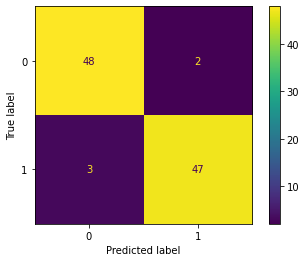

In [19]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.96      0.94      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

